# Business Problem

An A/B test compares the performance of varying webpage designs. Webpage variations can be anything from changing an image, to the Call-To-Action button or the text on the page.

When it comes to the performance that you’re measuring, an A/B test can be used to compare metrics like conversion rates, engagements, drop-off rate, time spent on website and more. For this post, I created a fictional scenario in which I paid attention to the number of conversions between two versions of a webpage.****

**Imaginary company “KeepKool” sells beach cooler bags and is deciding whether or not to update the image used on their product page for their classic product “the KeepKool”. The hope is that using a more engaging photo will get visitors to convert more (click “Learn More”) on the product page. The current product page has a staged photo of the cooler bag with a gray background and they want to update the image to show the cooler actually at the beach.**


**Original Webpage:**

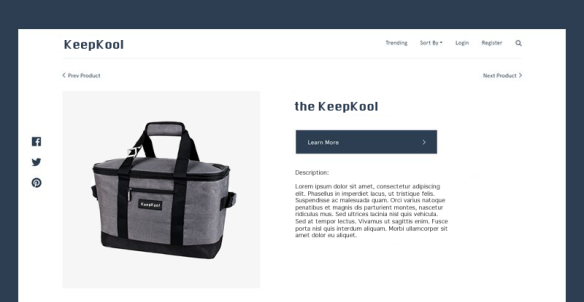
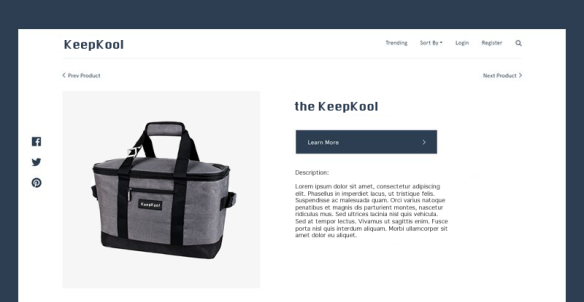

**Variant Webpage**

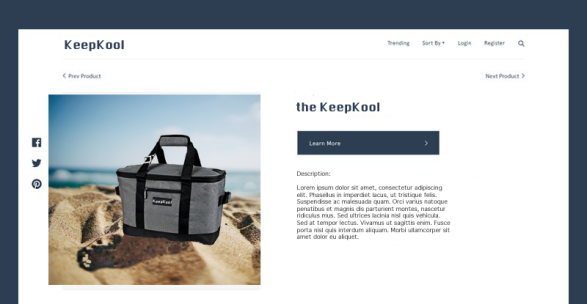

# Loading Packages

In [2]:
#install.packages("readxl")
library(readxl)
#install.packages("ggplot2")
library(ggplot2)
library(tidyverse)
#install.packages("lubridate")
library(lubridate)
#install.packages("WebPower")
#library(WebPower)
#install.packages("broom")
library(broom)
library(plotly)
library(purrr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config




# Data Analysis

In [3]:
baselineData <- read_excel('../input/abtestingdata/A_BTestingBaselineDataset.xlsx')

head(baselineData)

Date,ConversionsControl,ConversionsAlternate,TotalConversions
<dttm>,<dbl>,<dbl>,<dbl>
2019-01-01,9,0,9
2019-01-02,13,0,13
2019-01-03,2,0,2
2019-01-04,11,0,11
2019-01-05,22,0,22
2019-01-06,12,0,12


In [4]:
baselineData$Date <- as.Date(baselineData$Date)
head(baselineData)

Date,ConversionsControl,ConversionsAlternate,TotalConversions
<date>,<dbl>,<dbl>,<dbl>
2019-01-01,9,0,9
2019-01-02,13,0,13
2019-01-03,2,0,2
2019-01-04,11,0,11
2019-01-05,22,0,22
2019-01-06,12,0,12


In [8]:
baselineDataWeek <- baselineData %>% group_by(week(Date)) %>% summarize(conversion= mean(TotalConversions))

head(baselineDataWeek)

week(Date),conversion
<dbl>,<dbl>
1,11.714286
2,7.571429
3,1.428571
4,1.428571
5,1.571429
6,3.857143


In [ ]:
ggplot(baselineDataWeek, aes(x = `week(Date)`,
                           y = `conversion` )) +
  geom_point() +
  geom_line() +
  scale_y_continuous(limits = c(0, 30)) +
  ggtitle("Average Conversions for 'the KeepKool' Product Page by Week (2019)") +
  labs(y = "Number of Conversions", x = "Week Number")

**KeepKool already made the variant of the webpage live for the month of May 2019 to see if there was a difference between the number of conversions on the original webpage versus the variant webpage with 50% of visitors seeing the original and 50% of visitors seeing the variant. The reason they chose to do this in May is because this is the start of the summer when people tend to engage more on the site. We can see this from the average number of conversions by week for “the KeepKool” product page depicted below**

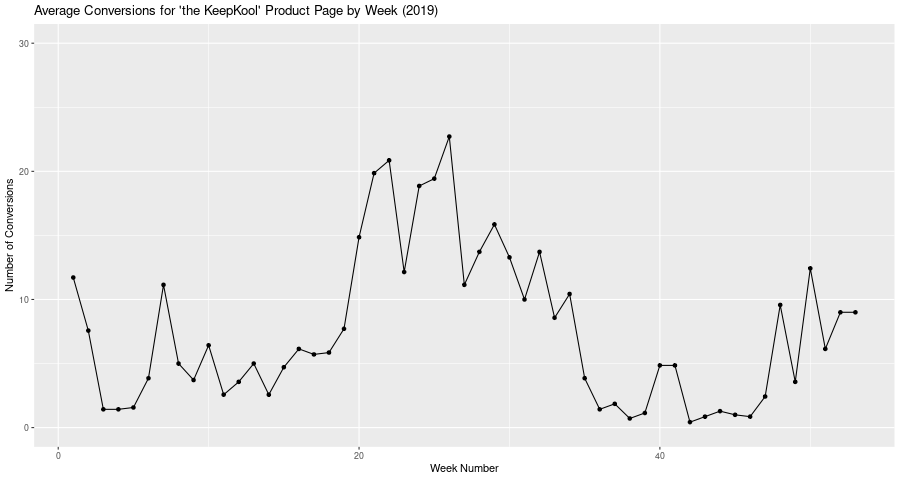

Getting Data for May

**KeepKool found that the average number of conversions for the variant was higher than that of the original; 8.69 for the variant and 4.76 for the original. However, since they did not methodologically plan out how long to keep the page live for or how much data to collect, it did not make sense to run a significance test on the data collected to see if this increase was statistically significant. KeepKool doesn’t want to permanently change the image until they know that the difference is statistically significant. Therefore, KeepKool decided to run a proper A/B test.**

In [7]:
baselineDataMay <- subset(baselineData, Date > "2019-05-01" & Date < "2019-05-31")

baselineDataMayAverages <- baselineDataMay %>%
  summarize(conversionMonthControl = mean(ConversionsControl), conversionMonthAlternate = mean(ConversionsAlternate))
baselineDataMayAverages

conversionMonthControl,conversionMonthAlternate
<dbl>,<dbl>
4.758621,8.689655


Percent Increase of Conversions in Testing group compared to Control Group 

In [6]:
(8.689655 - 4.758621)/4.758621

[1] 0.8260868

# Steps before AB test



Choose one variable to change (image)

Think about potential confounding factors (visitors accidentally seeing both versions of the webpage, increase in demand for the product)

Create a “control” and an “experiment” (the “original” and the “variant” webpages)

Determine the goal (to see if the difference between the mean conversions of both variations is statistically significant)
Determine Hypotheses:

Null Hypothesis: There is no statistical significant difference between the mean conversions of the Control and Experiment webpages.

Alternative Hypothesis: There is a statistical significant difference between the mean conversions of the Control and Experiment webpages.

Decide your significance level (default p-value is below alpha (0.05))

Determine what statistical test/distribution you need (to be determined below)

Determine your sample size (to be determined below)

# **Statistical Model**

**One of the first steps before doing an A/B test is to what know test you are going to use for your analysis. I plan to run a Generalized Linear Model (glm) regression. A regression can tell you what effect and if the effect on a dependent variable by an independent variable is statistically significant. Glm is a flexible version of the ordinary linear regression and allows you to adapt your regression for different statistical distributions.**

**This is important because the data being collected in this case is the number of conversions. Since a conversion, like a visit or a click, is considered count data, we are limited to distributions that can account for discrete data. A regular linear regression is limited to data with a normal distribution, but glm will allow me to use a Poisson distribution which accounts for discrete data. So, I plan to use a Poisson regression.**

# Power Analysis

**Power analysis is normally conducted before data collection to determine the smallest sample size that is suitable to detect the effect of a given test at the pre-decided level of significance. This can be helpful for marketers who don’t have a lot of time or money to run a long experiment.**

**The kind of power analysis test that is used is dependent on the distribution of the data. I already determined that the data collected will best be accounted for by a Poisson distribution, therefore, I will use the wp.poisson function in the WebPower package for my power analysis**

In [ ]:
wp.poisson(n = NULL, 
           exp0 = 4.758621, 
           exp1 = 0.8260868, 
           alpha = 0.05,
           power = 0.8, 
           alternative = "two.sided",
           family = "Poisson", 
           parameter = 1)

**Since Kaggle cannot process WebPower package to do the above function - we will use free online sample calculator for AB test -https://www.evanmiller.org/ab-testing/sample-size.html**

**Since data shows an increase in conversion in Testing page to be 4% more than control, we can assume 4% is the Minimum Desirable Effect needed to know the statistical confidence of the differences.**

**Based on the tool used above - it was shown that a minimum of 492 samples are required to know that the differences are statistically important and to reject the null hypothesis.**

# Analyzing Experiment Data

In [9]:
ExperimentData <- read_excel('../input/abtestingdata/A_BTestingExperimentData.xlsx')
ExperimentData$Date <- as.Date(ExperimentData$Date)
head(ExperimentData)

Date,Control,Experiment
<date>,<dbl>,<dbl>
2020-05-01,4,8
2020-05-02,2,6
2020-05-03,1,7
2020-05-04,0,5
2020-05-05,4,9
2020-05-06,3,6


In [10]:
experimentData <- gather(ExperimentData, key = "Condition", value = "Conversions",
       Control, Experiment)

head(experimentData)

Date,Condition,Conversions
<date>,<chr>,<dbl>
2020-05-01,Control,4
2020-05-02,Control,2
2020-05-03,Control,1
2020-05-04,Control,0
2020-05-05,Control,4
2020-05-06,Control,3


In [11]:
experimentData %>%
  group_by(Condition) %>%
  summarize(conversionMean = mean(Conversions), conversionVar = var(Conversions))

Condition,conversionMean,conversionVar
<chr>,<dbl>,<dbl>
Control,12.58462,76.77788
Experiment,16.00000,68.46875


**Similar to the baseline data, it seems that Experiment page had more conversions throughout the month. Comparing the means, 12.58 for the Control and 16.00 for the Experiment, confirms this.**

In [ ]:
ggplot(experimentData, aes(x = Date, y = Conversions, group = Condition, col = Condition)) +
  geom_point() +
  geom_line() +
  ggtitle("Control vs. Experiment Webpage Conversions (May-July 2020)") +
  labs(y = "Number of Conversions")

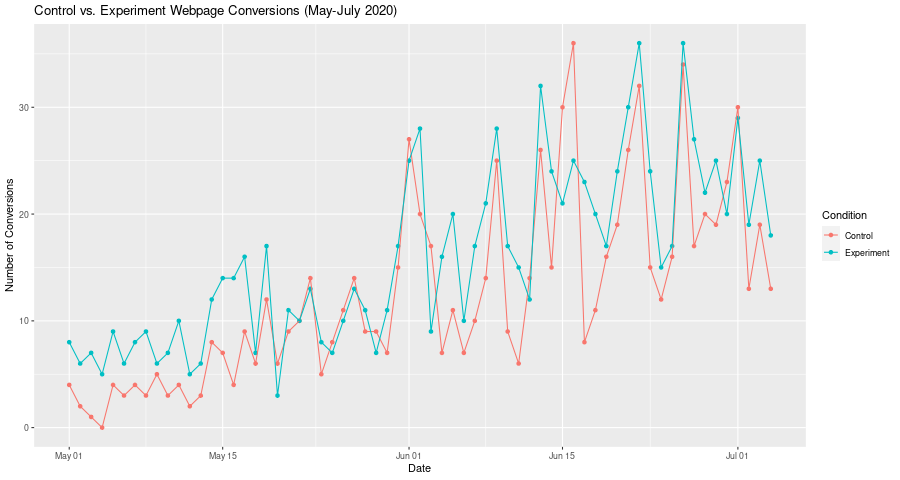

**Before running the Poisson regression, I decide to look at the variances for both the Control and Experiment variables, since one of the requirements for the Poisson regression is that the variance be equal or similar to the mean. The variances for the Control and Experiment variables are 76.78 and 68.47, respectively. Clearly not close to their means. Therefore, I will use the Quasi-Poisson regression instead, because it is the generalized version of the Poisson regression which can be used when the variance is greater than the mean.**

**Now, let’s look at glm regression for the Quasi-Poisson distribution to test the significance of the Experiment variable’s effect on conversions, where tidy() is a function that cleans up the output:**

# Modelling

In [12]:
glm(Conversions ~ Condition, family = "quasipoisson", data = experimentData) %>%
  tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.5324751,0.07965477,31.793136,1.323341e-62
ConditionExperiment,0.2401137,0.10646773,2.255272,2.581432e-02


p value for Experiment Condition is 0.02 which is less than .05 .So we can say the results are statistically significant

# Conclusion

**From the regression output, the estimate for the Experiment Condition is positive meaning that the Experiment webpage increases conversions; this confirms what was observed in the baseline data. The p-value for the Experiment Condition is less than 0.05. This means that there is a statistical significant difference between the mean conversions of the Control and Experiment webpages. Therefore, we can reject the Null Hypothesis, and KeepKool can permanently change the image on their webpage in order to get more conversions.**